## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.io import DataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 5$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [3]:
data.sample_params_from_prior(10000)

In [4]:
sigma = 1
data.simulate_data(data.params,
                   sigma, 
                   'linear_homogeneous'
                    )

Linear simulation data generated.


Let's take a look at this simulated dataset.

In [5]:
print(np.shape(data.output[0]))
data.output

torch.Size([101])


tensor([[ 3.9058e-01,  7.7643e+00,  1.6298e+01,  ...,  6.9939e+02,
          7.0486e+02,  7.1367e+02],
        [-6.4950e+00, -2.6558e+00,  2.8893e+00,  ...,  4.8536e+02,
          4.9202e+02,  4.9857e+02],
        [ 6.0513e+00,  9.2956e+00,  1.2403e+01,  ...,  2.1546e+02,
          2.2076e+02,  2.2120e+02],
        ...,
        [-6.6818e+00, -1.7014e+00,  1.0612e+00,  ...,  3.3431e+02,
          3.3741e+02,  3.3874e+02],
        [ 8.6696e+00,  1.6559e+01,  2.2787e+01,  ...,  8.4697e+02,
          8.5514e+02,  8.6213e+02],
        [ 5.7843e+00,  1.4360e+01,  2.3827e+01,  ...,  9.1559e+02,
          9.2791e+02,  9.3449e+02]])

In [6]:
data.params

tensor([[ 7.1242,  1.1030],
        [ 5.0352, -7.2487],
        [ 2.1568,  6.0958],
        ...,
        [ 3.4574, -5.9268],
        [ 8.5702,  7.0292],
        [ 9.3147,  4.3339]])

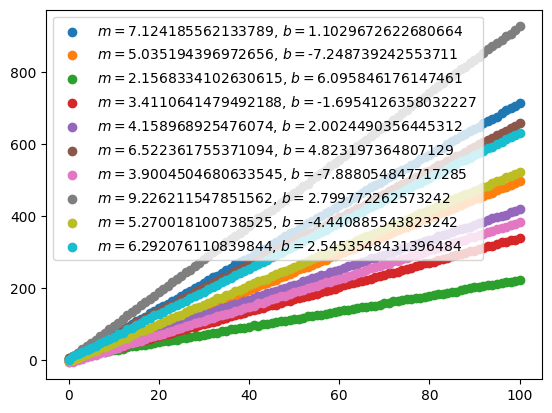

In [7]:
plt.clf()
for i in range(10):
    plt.scatter(data.input, data.output[i],
                label = f'$m = ${data.params[i][0].numpy()}, $b = ${data.params[i][1].numpy()}')
plt.legend()
plt.show()
    

In [8]:
# now make it into a dataframe
dict = data.get_dict()
dict

{'params': tensor([[ 7.1242,  1.1030],
         [ 5.0352, -7.2487],
         [ 2.1568,  6.0958],
         ...,
         [ 3.4574, -5.9268],
         [ 8.5702,  7.0292],
         [ 9.3147,  4.3339]]),
 'inputs': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 'output': tensor([[ 3.9058e-01,  7.7643e+00,  1.6298e+01,  ...,  6.9939e+02,
           7.0486e+02,  

## Save the data to h5

In [9]:
saver = DataLoader()

In [10]:
# save the dataframe
filepath = '../data/'
saver.save_data_h5('linear_sigma_1.csv', dict)